In [13]:
import os, json
import clean
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#os.chdir('account/')
path_to_json = 'account/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]


In [3]:
account={}
for js in json_files:
    with open(path_to_json+js) as infile:
        sample = json.load(infile)
    account_name = sample[0]['screen_name']
    account[account_name] = sample[0]['followers_count']# = tokenize(sample['text'])
    #martian.append(sample)
    

In [4]:
account

{u'BridgeofSpies': 3581,
 u'MadMaxMovie': 41737,
 u'MartianMovie': 29972,
 u'RevenantMovie': 27156,
 u'RoomTheMovie': 5664,
 u'SpotlightMovie': 6462,
 u'thebigshort': 54629}

In [5]:
#os.chdir('account/')
path_to_json = 'search/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]


In [99]:
tweet_stat_each_movie={}
for js in json_files:
    with open(path_to_json+js) as infile:
        sample = json.load(infile)
    favorite_sum = sum([t['favorite_count'] for t in sample[0]])
    retweet_sum = sum([t['retweet_count'] for t in sample[0]])#(sample[0][0]['retweet_count']
    total_tweet = len(sample[0])
    name = js[7:len(js)-5]
    tweet_stat_each_movie[name] ={ 'favorite_pro':favorite_sum/float(total_tweet),
                                  'favorite':favorite_sum,
                                'retweet_pro': retweet_sum/float(total_tweet),
                                  'retweet':retweet_sum,
                                'total_tweet' : total_tweet}
    

In [76]:
json_files[0][7:len(json_files[0])-5]

'bridgeofspies'

In [100]:
tweet_stat_each_movie

{'bridgeofspies': {'favorite': 1009,
  'favorite_pro': 0.6243811881188119,
  'retweet': 13821,
  'retweet_pro': 8.552599009900991,
  'total_tweet': 1616},
 'brooklynmovie': {'favorite': 1034,
  'favorite_pro': 1.035035035035035,
  'retweet': 23903,
  'retweet_pro': 23.926926926926928,
  'total_tweet': 999},
 'madmaxmovie': {'favorite': 0,
  'favorite_pro': 0.0,
  'retweet': 4,
  'retweet_pro': 0.3076923076923077,
  'total_tweet': 13},
 'martianmovie': {'favorite': 3,
  'favorite_pro': 0.21428571428571427,
  'retweet': 98,
  'retweet_pro': 7.0,
  'total_tweet': 14},
 'revenantmovie': {'favorite': 82,
  'favorite_pro': 0.4293193717277487,
  'retweet': 20568,
  'retweet_pro': 107.68586387434554,
  'total_tweet': 191},
 'roomthemovie': {'favorite': 45,
  'favorite_pro': 0.26785714285714285,
  'retweet': 9606,
  'retweet_pro': 57.17857142857143,
  'total_tweet': 168},
 'spotlightmovie': {'favorite': 1337,
  'favorite_pro': 0.60828025477707,
  'retweet': 417895,
  'retweet_pro': 190.12511373

In [23]:
a = pd.DataFrame.from_dict(account, orient='index')
a.columns = ['followers_count']
a

,followers_count
MartianMovie,29972
SpotlightMovie,6462
RevenantMovie,27156
thebigshort,54629
MadMaxMovie,41737
RoomTheMovie,5664
BridgeofSpies,3581


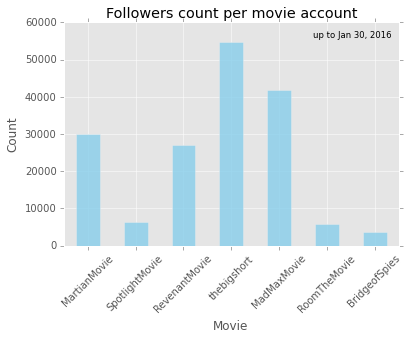

In [143]:
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
a.followers_count.plot(kind = 'bar',title = 'Followers count per movie account',
                       color = 'skyblue',alpha = 0.8)
plt.xticks(rotation=45)
#ax1.bar(X, Y)
#ax1.set_title('Survived')
ax1.set_xlabel('Movie')
ax1.set_ylabel('Count')
ax1.text(4.7, 56000, "up to Jan 30, 2016",fontsize=8.5)

#ax1.set_xticks([0.4, 1.4])
#ax1.set_xticklabels(['No...', 'Yes!!'])

#ax2 = fig.add_subplot(1,2,2)
#ax2.pie(Y, labels=['No...', 'Yes!!!'])

fig.savefig('followers count per movie.pdf')
fig.show()

In [101]:
b = pd.DataFrame.from_dict(tweet_stat_each_movie, orient='index')
#a.columns = ['followers_count']
b.index
b

,favorite_pro,total_tweet,favorite,retweet_pro,retweet
bridgeofspies,0.624381,1616,1009,8.552599,13821
brooklynmovie,1.035035,999,1034,23.926927,23903
madmaxmovie,0.000000,13,0,0.307692,4
martianmovie,0.214286,14,3,7.000000,98
revenantmovie,0.429319,191,82,107.685864,20568
roomthemovie,0.267857,168,45,57.178571,9606
spotlightmovie,0.608280,2198,1337,190.125114,417895
thebigshort,0.915479,5194,4755,122.644782,637017


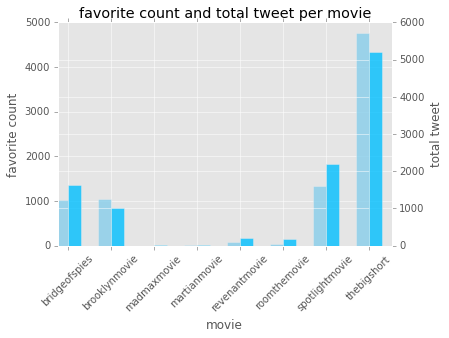

In [144]:
#import numpy as np
#import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

b.favorite.plot(kind = 'bar',title = 'favorite count and total tweet per movie',ax=ax1,
                       color = 'skyblue',alpha = 0.8,position=1,width=0.3)

#t = np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
#ax1.plot(t, s1, 'b-')
ax1.set_xlabel('movie')
ax1.set_ylabel('favorite count')
plt.xticks(rotation=45)
# Make the y-axis label and tick labels match the line color.
#ax1.set_ylabel('exp', color='b')
#for tl in ax1.get_yticklabels():
 
    #tl.set_color('b')
#df.amount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
#df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


ax2 = ax1.twinx()
b.total_tweet.plot(kind = 'bar',ax=ax2,
                       color = 'deepskyblue',alpha = 0.8,position=0,width=0.3)
ax2.set_ylabel('total tweet')

fig.savefig('favorite count&total tweet per movie.pdf')

plt.show()

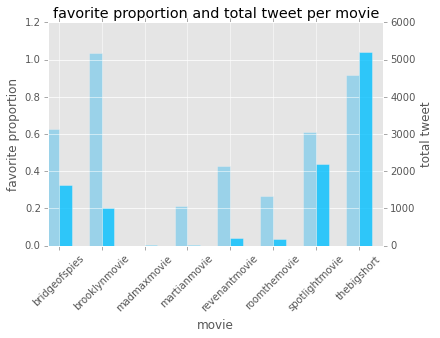

In [145]:
#import numpy as np
#import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

b.favorite_pro.plot(kind = 'bar',title = 'favorite proportion and total tweet per movie',ax=ax1,
                       color = 'skyblue',alpha = 0.8,position=1,width=0.3)

#t = np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
#ax1.plot(t, s1, 'b-')
ax1.set_xlabel('movie')
ax1.set_ylabel('favorite proportion')
plt.xticks(rotation=45)
# Make the y-axis label and tick labels match the line color.
#ax1.set_ylabel('exp', color='b')
#for tl in ax1.get_yticklabels():
 
    #tl.set_color('b')
#df.amount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
#df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


ax2 = ax1.twinx()
b.total_tweet.plot(kind = 'bar',ax=ax2,
                       color = 'deepskyblue',alpha = 0.8,position=0,width=0.3)
ax2.set_ylabel('total tweet')

fig.savefig('favorite proportion & total tweet per movie.pdf')

plt.show()

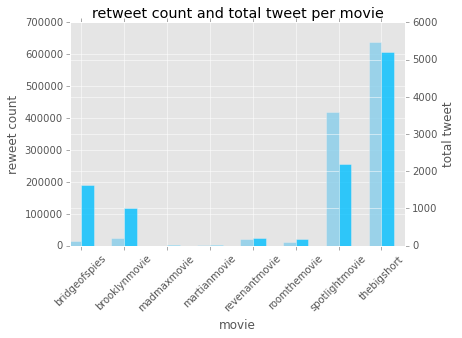

In [146]:
#import numpy as np
#import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

b.retweet.plot(kind = 'bar',title = 'retweet count and total tweet per movie',
                       color = 'skyblue',alpha = 0.8,position=1,width=0.3,label = 'retweet')
#t = np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
#ax1.plot(t, s1, 'b-')
ax1.set_xlabel('movie')
ax1.set_ylabel('reweet count')
plt.xticks(rotation=45)
# Make the y-axis label and tick labels match the line color.
#ax1.set_ylabel('exp', color='b')
#for tl in ax1.get_yticklabels():
 
    #tl.set_color('b')
#df.amount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
#df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


ax2 = ax1.twinx()
b.total_tweet.plot(kind = 'bar',
                       color = 'deepskyblue',alpha = 0.8,position=0,width=0.3,label='total tweet')

ax2.set_ylabel('total tweet')
#label=['reweet,total tweet']

#plt.legend(label, loc='best')
#ax1.legend(loc='best')
#ax2.legend(loc='best')
#plt.legend( ['Line Up', 'Line Down'])

fig.savefig('retweet count &total tweet per movie.pdf')
plt.show()

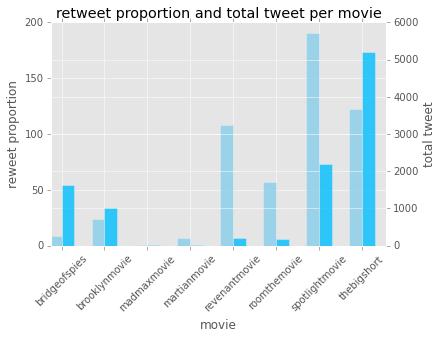

In [141]:
#import numpy as np
#import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

b.retweet_pro.plot(kind = 'bar',title = 'retweet proportion and total tweet per movie',
                       color = 'skyblue',alpha = 0.8,position=1,width=0.3,label = 'retweet')
#t = np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
#ax1.plot(t, s1, 'b-')
ax1.set_xlabel('movie')
ax1.set_ylabel('reweet proportion')
plt.xticks(rotation=45)
# Make the y-axis label and tick labels match the line color.
#ax1.set_ylabel('exp', color='b')
#for tl in ax1.get_yticklabels():
 
    #tl.set_color('b')
#df.amount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
#df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


ax2 = ax1.twinx()
b.total_tweet.plot(kind = 'bar',
                       color = 'deepskyblue',alpha = 0.8,position=0,width=0.3,label='total tweet')

ax2.set_ylabel('total tweet')
#label=['reweet,total tweet']

#plt.legend(label, loc='best')
#ax1.legend(loc='best')
#ax2.legend(loc='best')
#plt.legend( ['Line Up', 'Line Down'])
fig.savefig('retweet proportion and total tweet per movie')
plt.show()